In [ ]:
import numpy as np
from IPython.display import display, Markdown

In [ ]:
def plotXML(s):
    formatted_string = f'```\n{s}\n```'
    display(Markdown(formatted_string))

## Open File with TiXI

In [ ]:
from tixi3 import tixi3wrapper

In [ ]:
tixi_h = tixi3wrapper.Tixi3()

In [ ]:
tixi_h.open("wing.xml")

## Transformation the element of section 2

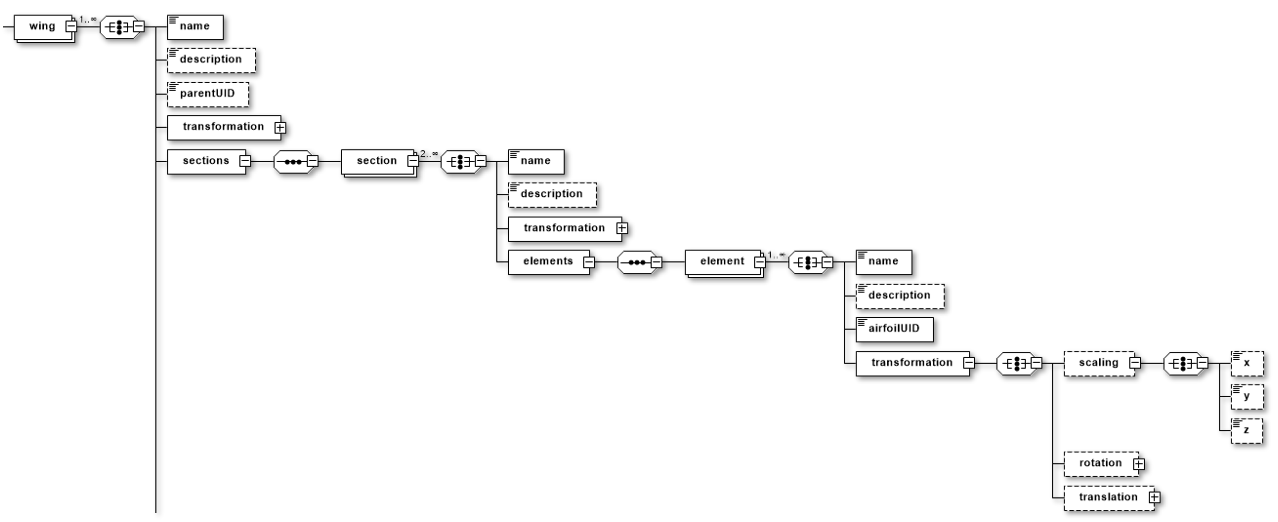

Get the XPath of the element. Maybe there is a smarter way than hard-coding the entire XPath?

In [ ]:
# element_xPath = ...

In [ ]:
# %load ./resources/solutions/getElementXPath.py

Add a scaling of the element of 0.5 in x and z:

In [ ]:
# ...

In [ ]:
# %load ./resources/solutions/addScaling.py

Add a translation of 0.5m in x:

In [ ]:
# %load ./resources/solutions/addTranslation.py

In [ ]:
try:
    s = tixi_h.exportElementAsString(element_xPath)
    plotXML(s)
except:
    print("element_xPath not yet defined")

## Plotting

In [ ]:
from OCC.Display.WebGl.jupyter_renderer import JupyterRenderer
from tigl3 import tigl3wrapper
import tigl3.configuration

In [ ]:
tigl_h = tigl3wrapper.Tigl3()
tigl_h.open(tixi_h,"")

In [ ]:
mgr = tigl3.configuration.CCPACSConfigurationManager_get_instance()
aircraft_config = mgr.get_configuration(tigl_h._handle.value)
wing = aircraft_config.get_wing(1)
wing_shape = wing.get_loft()

In [ ]:
renderer = JupyterRenderer(size=(700,700))
renderer.DisplayShape(wing_shape.shape(), transparency=True,render_edges=True)
renderer.Display()